1. Download Dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/flowers

[Errno 2] No such file or directory: '/content/drive/MyDrive/flowers'
/content


2. Image Agumentation

In [5]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
batch_size = 32
img_height = 180
img_width = 180
data_dir = "/content/drive/MyDrive/flowers"

In [4]:
train_datagen = ImageDataGenerator(rescale = 1./255, horizontal_flip = True, vertical_flip = True, zoom_range = 0.2)
x_train = train_datagen.flow_from_directory('/content/drive/MyDrive/flowers',
                                                target_size=(64,64),
                                                class_mode='categorical',
                                                batch_size=100)

FileNotFoundError: ignored

In [ ]:
data_augmentation = Sequential(
  [
    layers.RandomFlip("vertical",input_shape=(img_height, img_width, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

3. Creating a Model

In [ ]:
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense
model = Sequential()
training_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=57,
  image_size=(img_height, img_width),
  batch_size=100)

Found 4323 files belonging to 5 classes.
Using 3459 files for training.


In [ ]:
validation_ds = tf.keras.utils.image_dataset_from_directory(data_dir,validation_split=0.2,subset="validation",seed=107,image_size=(img_height, img_width),batch_size=batch_size)

Found 4323 files belonging to 5 classes.
Using 864 files for validation.


In [ ]:
training_ds.class_names

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

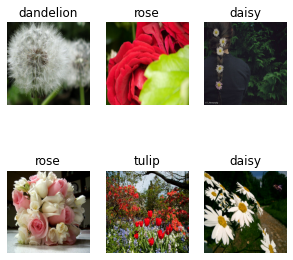

In [ ]:
plt.figure(figsize=(5, 5))
for data, labels in training_ds.take(1):
  for i in range(6):
    ax = plt.subplot(2, 3, i + 1)
    plt.imshow(data[i].numpy().astype("uint8"))
    plt.title(training_ds.class_names[labels[i]])
    plt.axis("off")

4.Add Layers
a) Convolution layer

b) Maxpooling layer

c) Flatten

d) Hidden/dense layers

e) Output layer

In [ ]:
'''a) Convolution layer'''

model.add(Convolution2D(32,(3,3),activation="relu",input_shape=(64,64,3)))


'''b) Maxpooling layer'''

model.add(MaxPooling2D(pool_size = (2,2)))

'''c) Flatten'''

model.add(Flatten())


'''d) Hidden/dense layers'''

model.add(Dense(300, activation = "relu"))
model.add(Dense(150, activation = "relu"))


'''e) Output layer'''

model.add(Dense(5, activation = "softmax"))

5. Compiling Model

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

6.Fit the Model

In [ ]:
model.fit(x_train, epochs = 15, steps_per_epoch = len(x_train))

Epoch 1/15
44/44 [==============================] - 425s 10s/step - loss: 1.6147 - accuracy: 0.3738
Epoch 2/15
44/44 [==============================] - 36s 811ms/step - loss: 1.1479 - accuracy: 0.5242
Epoch 3/15
44/44 [==============================] - 37s 836ms/step - loss: 1.0846 - accuracy: 0.5563
Epoch 4/15
44/44 [==============================] - 37s 841ms/step - loss: 1.0269 - accuracy: 0.6014
Epoch 5/15
44/44 [==============================] - 40s 897ms/step - loss: 0.9573 - accuracy: 0.6308
Epoch 6/15
44/44 [==============================] - 38s 865ms/step - loss: 0.9386 - accuracy: 0.6373
Epoch 7/15
44/44 [==============================] - 38s 858ms/step - loss: 0.8804 - accuracy: 0.6579
Epoch 8/15
44/44 [==============================] - 37s 842ms/step - loss: 0.8647 - accuracy: 0.6694
Epoch 9/15
44/44 [==============================] - 38s 855ms/step - loss: 0.8195 - accuracy: 0.6873
Epoch 10/15
44/44 [==============================] - 37s 836ms/step - loss: 0.8241 - accurac

7. Save The Model

In [ ]:
model.save("flowers.h1")

8. Test the Model

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
model = load_model("/content/drive/MyDrive/flowers/flowers.h1")
daisy_img = image.load_img('/content/drive/MyDrive/flowers/daisy/100080576_f52e8ee070_n.jpg',target_size=(64,64))
x = image.img_to_array(daisy_img)
x = np.expand_dims(x,axis=0)
predicted_class=model.predict(x)
labels = ['daisy','dandelion','roses','sunflowers','tulips']
labels[np.argmax(predicted_class)]

'sunflowers'

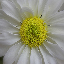

In [ ]:
m=daisy_img
m